<a href="https://colab.research.google.com/github/kslapinski/data-science-portfolio/blob/main/projekt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PAN Card Tampering Detection

#### This project aims to detect tampering in PAN cards using computer vision, helping organizations verify the authenticity of PAN cards submitted by employees or customers by comparing the structural similarity between the original and uploaded cards.

In [ ]:
# import packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/Colab Notebooks/PROJEKT/projekt-1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Loading the original image and the one uploaded by the user.

In [ ]:
original = Image.open(requests.get('https://upload.wikimedia.org/wikipedia/commons/3/31/A_sample_of_Permanent_Account_Number_%28PAN%29_Card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

In [ ]:
print("Original format: ",original.format)
print("Original size: ",original.size)
print("")
print("Tampered format: ",tampered.format)
print("Tampered size: ",tampered.size)

Original format:  JPEG
Original size:  (509, 314)

Tampered format:  PNG
Tampered size:  (282, 179)


#### Resizing was needed to ensure both images have the same dimensions, allowing for accurate comparison and analysis without discrepancies.

In [ ]:
width, height = original.size
new_width = 250
new_height = int((new_width / width) * height)

original = original.resize((new_width, new_height))
original.save(base_path+"images/original.png")
print("Original size: ",original.size)

tampered = tampered.resize((new_width, new_height))
tampered.save(base_path+"images/tampered.png")
print("Tampered size: ",tampered.size)

Original size:  (250, 154)
Tampered size:  (250, 154)


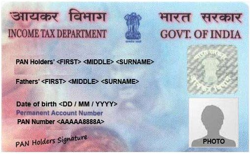

In [ ]:
# Display original
original

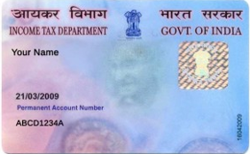

In [ ]:
# Display tampered
tampered

#### Reading images using OpenCV.

In [ ]:
original = cv2.imread(base_path+'images/original.png')
tampered = cv2.imread(base_path+'images/tampered.png')

#### Converting images to grayscale, as it simplifies the process by reducing the complexity of having multiple channels, making it easier for the machine to detect key features like edges.

In [ ]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

#### Structural similarity index (SSIM) helps us to determine exactly where in terms of X, Y coordinates location, the image differences are. The lower the SSIM score lower is the similarity.

In [ ]:
# Compute SSIM score and difference map between two images
(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)

# Scale the difference map to the range 0-255 and convert to uint8 type
diff = (diff*255).astype("uint8")

print("SSIM: {}".format(score))

SSIM: 0.31658840013007983


#### Thresholding binarizes the image to emphasize key features.
#### FindContours detects shapes, and GrabContours retrieves the contours for further processing.



In [ ]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#### The bounding rectangle helps calculate the width-to-height ratio of an object. It highlights differences between two images by drawing the contour is bounding box on them.


In [ ]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

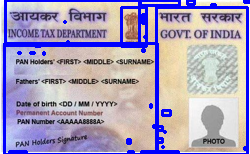

In [ ]:
# Display original image with contour
Image.fromarray(original)

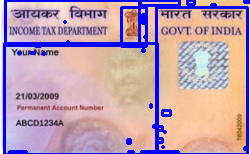

In [ ]:
# Display tampered image with contour
Image.fromarray(tampered)

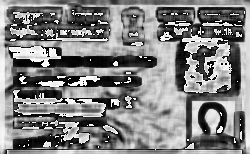

In [ ]:
# Display difference image with black
Image.fromarray(diff)

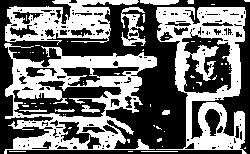

In [ ]:
# Display threshold image with white
Image.fromarray(thresh)

### Summary

#### Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.  
#### With an SSIM of ~31.7%, we conclude the image is likely fake.  
#### We visualized differences and similarities using contours, threshold, and differences.

### SCOPE


#### This project can help organizations verify if submitted IDs are authentic or fraudulent.